In [83]:
import numpy as np
import gstools as gs
import matplotlib.pyplot as plt
from math import *
from tqdm import tqdm
import pandas as pd
from scipy import interpolate


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-white') 




In [63]:
p = 0.2
# make a random field with 2k correlation length
x = y = np.arange(0,50000,100)
L = 2000
#working var = 0.5
var=1.0

model = gs.Exponential(dim=2, var=var, len_scale=L)

srf = gs.SRF(model)

field = srf.structured([x, y])
# make a 5k presence-absence field
L = 4000
var = 1

model = gs.Gaussian(dim=2, var=var, len_scale=L)
srf = gs.SRF(model)

# we make the pa field bigger so we can centre it on the largest cluster of wildebeest
x2 = y2 = np.arange(-50000,100000,1000)
pa_field = srf.structured([x2, y2])
# interpolate as the grid generation is slow for large N
f = interpolate.interp2d(x2, y2, pa_field, kind='cubic')
x2 = y2 = np.arange(-50000,100000,100)

pa_field = f(x2,y2)

# next we find the highest value of the pa field
ij = pa_field[500:1000,500:1000].argmax()
# and centre it so it's at the middle of the survey
i = ij//500
j = ij - i*500
pa_field2 = pa_field[500+i-250:500+i+250,500+j-250:500+j+250]

# only populate the top p%
cutoff = np.percentile(pa_field2,100*(1-p))

log_intense_field1 = field.copy()
presence_field1 = np.ones_like(pa_field2)
presence_field1[pa_field2<cutoff]=0

# set to negative infinity sets it to zero when we take the exponential
field[pa_field2<cutoff]=-np.inf

#set the mean so we end up with roughly 1.3m wildebeest
target_w = 1300000
vf = np.var(field[np.isfinite(field)])
mf = np.mean(field[np.isfinite(field)])
target_log_density = np.log(target_w/(p*50000*50000))-0.5*vf-mf

# generate a random count for each grid cell of 100mx100m
wcounts = np.random.poisson(lam = 100*100*np.exp(target_log_density+field))

# next place the wildebeest in a random location within their cell
total = wcounts.sum()
positions = np.zeros((total,2))

min_x = 0
max_x = 50000
min_y = 0
max_y = 50000

w = 0
for i in (range(len(x))):
    for j in range(len(y)):
        wtotal =  wcounts[i,j]
        positions[w:w+wtotal,0]=x[i]+np.random.uniform(100,size=wtotal) # place at random in the 100x100 cell
        positions[w:w+wtotal,1]=y[j]+np.random.uniform(100,size=wtotal)
        w = w + wtotal


# fly the survey
yvals = np.arange(positions[:,1].min(),positions[:,1].max(),2500)
yvals = np.arange(135,max_y,2500)
photos=[]
transect=0
for yv in (yvals):

    ymin = yv - 135
    ymax = yv + 135
    
    xvals = np.arange(90,max_x,500)

    if len(xvals):
        transect+=1

    for xv in xvals:

        xrand = 0#np.random.uniform(-10,10)
        # images are 180x270 metres
        xmin = xv - 90
        xmax = xv + 90
        xmin = xmin + xrand
        xmax = xmax + xrand

        yrand = 0#np.random.uniform(-10,10)
        ymin = ymin + yrand
        ymax = ymax + yrand

        count = np.sum((positions[:,0]>xmin)&(positions[:,0]<xmax)&(positions[:,1]>ymin)&(positions[:,1]<ymax))
    
        photo = [xv+xrand,yv+yrand,count,transect]
        photos.append(photo)

photos = np.array(photos)  

photos1 = photos.copy()


In [64]:
p = 0.6
# make a random field with 2k correlation length
x = y = np.arange(0,50000,100)
L = 2000
#working var = 0.5
var=1.0
model = gs.Exponential(dim=2, var=var, len_scale=L)

srf = gs.SRF(model)

field = srf.structured([x, y])

# make a 5k presence-absence field
L = 4000
var = 1
model = gs.Gaussian(dim=2, var=var, len_scale=L)
srf = gs.SRF(model)

# we make the pa field bigger so we can centre it on the largest cluster of wildebeest
x2 = y2 = np.arange(-50000,100000,1000)
pa_field = srf.structured([x2, y2])
# interpolate as the grid generation is slow for large N
f = interpolate.interp2d(x2, y2, pa_field, kind='cubic')
x2 = y2 = np.arange(-50000,100000,100)

pa_field = f(x2,y2)

# next we find the highest value of the pa field
ij = pa_field[500:1000,500:1000].argmax()
# and centre it so it's at the middle of the survey
i = ij//500
j = ij - i*500
pa_field2 = pa_field[500+i-250:500+i+250,500+j-250:500+j+250]

# only populate the top p%
cutoff = np.percentile(pa_field2,100*(1-p))

log_intense_field2 = field.copy()
presence_field2 = np.ones_like(pa_field2)
presence_field2[pa_field2<cutoff]=0

# set to negative infinity sets it to zero when we take the exponential
field[pa_field2<cutoff]=-np.inf

#set the mean so we end up with roughly 1.3m wildebeest
target_w = 1300000
vf = np.var(field[np.isfinite(field)])
mf = np.mean(field[np.isfinite(field)])
target_log_density = np.log(target_w/(p*50000*50000))-0.5*vf-mf

# generate a random count for each grid cell of 100mx100m
wcounts = np.random.poisson(lam = 100*100*np.exp(target_log_density+field))

# next place the wildebeest in a random location within their cell
total = wcounts.sum()
positions = np.zeros((total,2))

min_x = 0
max_x = 50000
min_y = 0
max_y = 50000
#print(total)
w = 0
for i in (range(len(x))):
    for j in range(len(y)):
        wtotal =  wcounts[i,j]
        positions[w:w+wtotal,0]=x[i]+np.random.uniform(100,size=wtotal) # place at random in the 100x100 cell
        positions[w:w+wtotal,1]=y[j]+np.random.uniform(100,size=wtotal)
        w = w + wtotal


# fly the survey
yvals = np.arange(positions[:,1].min(),positions[:,1].max(),2500)
yvals = np.arange(135,max_y,2500)
photos=[]
transect=0
for yv in (yvals):

    ymin = yv - 135
    ymax = yv + 135

    xvals = np.arange(90,max_x,500)

    if len(xvals):
        transect+=1

    for xv in xvals:

        xrand = 0#np.random.uniform(-10,10)
        # images are 180x270 metres
        xmin = xv - 90
        xmax = xv + 90
        xmin = xmin + xrand
        xmax = xmax + xrand

        yrand = 0#np.random.uniform(-10,10)
        ymin = ymin + yrand
        ymax = ymax + yrand

        count = np.sum((positions[:,0]>xmin)&(positions[:,0]<xmax)&(positions[:,1]>ymin)&(positions[:,1]<ymax))
    
        photo = [xv+xrand,yv+yrand,count,transect]
        photos.append(photo)

photos = np.array(photos)  

photos2 = photos.copy()


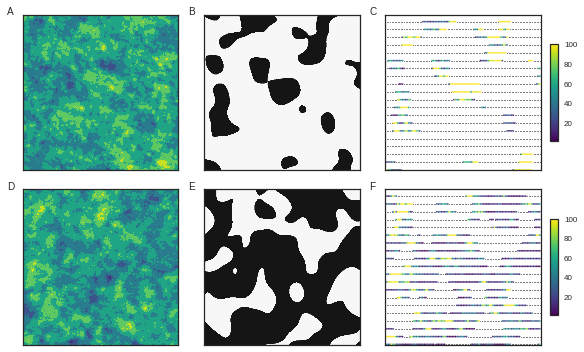

In [84]:
fig, axs = plt.subplots(2, 3, figsize=(8,4.8),sharex=True,sharey=True, constrained_layout=True)



ax01 = axs[0, 0].contourf(y,x,log_intense_field1.T,cmap='viridis')
axs[0, 0].set_aspect('equal')

ax01 = axs[0, 1].contourf(y,x,presence_field1.T)
axs[0, 1].set_aspect('equal')

ax11 = axs[0, 2].scatter(photos1[photos1[:,2]>0,0],photos1[photos1[:,2]>0,1],c=photos1[photos1[:,2]>0,2],s=2,cmap='viridis',vmax=100)
axs[1, 2].set_aspect('equal')

ax11a = axs[0, 2].scatter(photos1[photos1[:,2]==0,0],photos1[photos1[:,2]==0,1],s=1,marker='.',c='k')
axs[0, 2].set_aspect('equal')


cbar = fig.colorbar(ax11, ax=axs[0, 2],fraction = 0.1, shrink=0.6)#,format=formatter)


ax01 = axs[1,0].contourf(y,x,log_intense_field2.T,cmap='viridis')
axs[1, 0].set_aspect('equal')


ax11 = axs[1, 1].contourf(x,y,presence_field2.T)
axs[1, 1].set_aspect('equal')

ax12 = axs[1, 2].scatter(photos2[photos2[:,2]>0,0],photos2[photos2[:,2]>0,1],c=photos2[photos2[:,2]>0,2],s=2,cmap='viridis',vmax=100)
axs[1, 2].set_aspect('equal')

ax12a = axs[1, 2].scatter(photos2[photos2[:,2]==0,0],photos2[photos2[:,2]==0,1],s=1,marker='.',c='k')
axs[1, 2].set_aspect('equal')

cbar = fig.colorbar(ax12, ax=axs[1, 2],fraction = 0.1, shrink=0.6)#,format=formatter)

cbar.ax.tick_params(labelsize=8) 
#cbar.ax.yaxis.offsetText.set_fontsize(10)
#cbar.ax.yaxis.offsetText.set_x(3)


axs[0,0].text(-0.1,1,'A', size=10, transform=axs[0, 0].transAxes)
axs[0,1].text(-0.1,1,'B', size=10, transform=axs[0, 1].transAxes)
axs[0,2].text(-0.1,1,'C', size=10, transform=axs[0, 2].transAxes)
axs[1,0].text(-0.1,1,'D', size=10, transform=axs[1, 0].transAxes)
axs[1,1].text(-0.1,1,'E', size=10, transform=axs[1, 1].transAxes)
axs[1,2].text(-0.1,1,'F', size=10, transform=axs[1, 2].transAxes)


axs[0,0].tick_params( labelleft=False, labelbottom=False) 
axs[1,0].tick_params( labelleft=False, labelbottom=False) 
axs[1,1].tick_params( labelleft=False, labelbottom=False) 
axs[1,2].tick_params( labelleft=False, labelbottom=False) 




# plt.subplots_adjust(left=0.2,
#                     bottom=0.1, 
#                     right=0.7, 
#                     top=0.9, 
#                     wspace=0.1, 
#                     hspace=0.1)
plt.savefig("simulated_w.pdf",bbox_inches='tight')
plt.show()